### Parte 2 - Classificação Binária

#### (a)

weights: [ 1.92585555 -9.86765249]
[-1.2780761196861898, 3.3279382750644544] [-0.8682500535254098, 0.03069915304825721]


/home/intelie/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1672: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


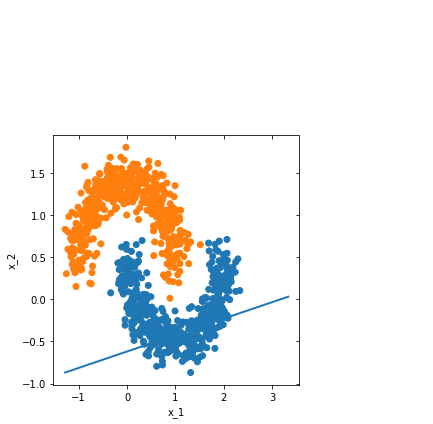

In [19]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

data = pd.read_csv('two_moons.csv',index_col=0)

%matplotlib inline

X = data[['x_1','x_2']].values
y = data.y.values

y_unique = data.y.unique()
replace_map_comp = {k: v for k,v in zip(y_unique,sns.color_palette(n_colors=len(y_unique)))}
colors = [replace_map_comp[a] for a in data.y.values]

   

lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(X,y)
X_lda = lda.transform(X)

coef = lda.coef_[0]
x_0 = [min(data.x_1), max(data.x_1)+1]
y_0 = [min(data.x_2), min(data.x_2) - (x_0[1]-x_0[0])*coef[0]/coef[1]]
print("weights: %s" % coef)
print("%s %s" %(x_0,y_0))

grid = sns.JointGrid(data.x_1, data.x_2, space=0, height=6, size=6, ratio=2)
grid.plot_joint(plt.scatter, color=colors)
f = plt.plot(x_0, y_0, linewidth=2)

* Non linear problem
* 

#### (b)
Calcular o coeficiente de fisher

Populating the interactive namespace from numpy and matplotlib


/home/intelie/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['mean', 'ceil', 'floor']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


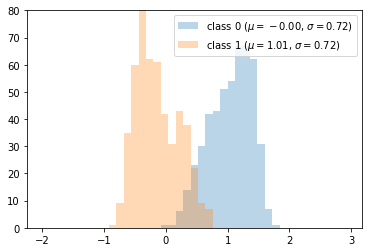

In [28]:
from math import floor, ceil 
%pylab inline

# the order of the colors for each histogram
colors = sns.color_palette(n_colors=len(y_unique)) #('red', 'green')
bins = np.arange(floor(min(X[:,0])), ceil(max(X[:,0])), 0.12)

# max count for a particular bin for all classes combined
max_bin = max(np.histogram(X[:,1], bins=bins)[0])

for label,color in zip([0, 1], colors):
    mean = np.mean(X[:,0][y == label]) # class sample mean
    stdev = np.std(X[:,0][y == label]) # class standard deviation
    hist(X[:,1][y == label], bins=bins, alpha=0.3, # opacity level
        label='class {} ($\mu={:.2f}$, $\sigma={:.2f}$)'.format(label, mean, stdev),
        color=color)
ylim([0, max_bin])
legend(loc='upper right')
show()